#  <center>Project 1 - MLA210</center>
## <center>Spring 2023 </center>
### <center> The submission deadline is 31.03.2023</center>

<center> You are allowed to collaborate in pairs (but larger groups are not allowed).</center> 
#
<center> Write your NAME(s) here: Eljar & Artush</center> 


**Working process & ethics:** The important process of learning through problemsolving includes trial, error and exploration. It is therefore OK to discuss with other fellow students to share ideas and experiences - **BUT** copying the work of others **is strictly forbidden**.

The present project will need access to **the following Julia packages**:

In [1]:
using VMLS
using LinearAlgebra
using Plots
using Random

## Part A: Warm up (7 short exercises).

**Ex. A1:** The **[arithmetic mean](https://en.wikipedia.org/wiki/Mean#Arithmetic_mean_(AM))** (average) value $\mu$ of an $n$-dimensional vector $x$ can be calculated by the formula $\mu = \frac{1}{n}\sum_{i =1}^n x_i$. 

From linear algebra theory we know that with $1_n$ denoting the $n$-dimensional vector with ones (1) i all positions, the summation $\sum_{i =1}^n x_i$ can be calculated by the inner product $1_n^T x$, thus $\mu=\frac{1}{n}\sum_{i =1}^n x_i=\frac{1}{n}(1_n^T x)$. 

From Julia programming we also know that the dimension ($n$) of a vector $x$ can be found by `n = size(x,1)`, and that an $n$-vector of ones is given by `ones(n)`. 

Use this information and define your own Julia function `mymean(x)` to calculate the mean value of vectors. Fill in the required line(s) of code in the following "skeleton" to provide your solution.

In [2]:
function mymean(x)
    n = size(x, 1);
    sum_x = transpose(ones(n))*x
    μ = sum_x/n
    return μ
end

mymean (generic function with 1 method)

It's a good idea to check that your `mymean`-function is working correctly by comparing its calculations to the `avg(x)` -function in the VMLS-package for some real /random vectors.


**Ex. A2:** Explain the following lines of code by making informative comments (comments in Norwegian is fine):

In [3]:
# <... fill in introduction comment ....>:
nT = 10000;                   # Definerer antall iterasjoner
mymeanTest = zeros(nT, 2);    # Definerer en array helt til tallet 10000, med 2-kolonner

for k = 1:nT                   # Starter for-loopen hvor k går fra 1 til 10000
  n = rand(1:1000);            # n er et random tall mellom 1 og 1000
  x = n*rand(n);               # Definerer x som produktet av n og et tilfeldig annet tall mellom 0 og 1
  mymeanTest[k,1] = mymean(x); # Kalkulerer mean-verdien ved bruk av funksjonen vi lagde og setter det inn i rad 1
  mymeanTest[k,2] = avg(x);    # Det samme som over, bare med rad 2 istedet Julia sin innebygde funksjon
end

dT = mymeanTest[:,1]-mymeanTest[:,2];  # Finne differansen for å se om vår funksjon gir det samme som Julia sin innebygde funksjon
norm(dT)                               # Sjekker distansen mellom de to vektorene for å finne hvor like de er

3.968777341090956e-12

**Ex. A3:** The **[standard deviation](https://en.wikipedia.org/wiki/Standard_deviation#Discrete_random_variable)** of the values in an $n$-dimensional vector $x$ can be calculated by the formula $\sigma = \sqrt{\frac{1}{n}\sum_{i =1}^n (x_i-\mu)^2}$, where $\mu$ is the (arithmetic) mean defined above. 

Use this to define your own Julia function `mystd(x)` that calculates the standard deviation of vectors. Fill in the required line(s) of code in the "skeleton" below to provide your solution. 

**Hint:** The statement `(x.-μ).^2` in Julia computes the squared differences $(x_i-\mu)^2$ as a vector, and use this information and your `mymean`-function to calculate $\frac{1}{n}\sum_{i =1}^n (x_i-\mu)^2$. For calculating the square root of any number `t` in Julia you can use the square root function `sqrt(t)`.

In [4]:
function mystd(x)
    n = size(x, 1)
    σ = sqrt((1/n) * sum((x.-mymean(x)).^2))
    return σ
end

mystd (generic function with 1 method)

**Ex. A4:** Now, it's required to check that your `mystd`-function is working correctly by comparing its calculations to the `stdev(x)`-function in the VMLS-package for some real /random vectors. Copy and modify the code from exercise 2. above to do the comparisons.

In [5]:
# <... fill in introduction comment ....>:
nT = 10000;                   # Definerer antall iterasjoner
mymeanTest = zeros(nT, 2);    # Definerer en array helt til tallet 10000, med 2-kolonner

for k = 1:nT                   # Starter for-loopen hvor k går fra 1 til 10000
  n = rand(1:1000);            # n er et random tall mellom 1 og 1000
  x = n*rand(n);               # Definerer x som produktet av n og et tilfeldig annet tall mellom 0 og 1
  mymeanTest[k,1] = mystd(x); # Kalkulerer standard deviation verdien ved bruk av funksjonen vi lagde og setter det inn i rad 1
  mymeanTest[k,2] = stdev(x); # Det samme som over, bare med rad 2 istedet Julia sin innebygde funksjon
end

dT = mymeanTest[:,1]-mymeanTest[:,2];  # Finne differansen for å se om vår funksjon gir det samme som Julia sin innebygde funksjon
norm(dT)                               # Sjekker distansen mellom de to vektorene for å finne hvor like de er

2.70235186110204e-12

The [**correlation coefficient between two $n$-dimensional vectors $x$ and $y$**](https://en.wikipedia.org/wiki/Correlation#Sample_correlation_coefficient) can be defined as $\rho = \frac{\sum_{i=1}^n(x_i-\mu_x)(y_i-\mu_y)}{\sqrt{\sum_{i=1}^n(x_i-\mu_x)^2\sum_{i=1}^n(y_i-\mu_y)^2}}$, where $\mu_x$ and $\mu_y$ are the arithmetic means of $x$ and $y$, respectively.

**Ex. A5:** Use this to define your own Julia function `mycorr(x,y)` that calculates the correlation coefficient between two $n$-dimensional vectors $x$ and $y$ without coding the summation formulas in the definitions. Fill in the required line(s) of code in the "skeleton" below to provide your solution.

In [6]:
function mycorr(x, y)
    under = sqrt(sum((x.-mymean(x)).^2).*sum((y.-mymean(y)).^2))
    over = sum((x.-mymean(x)).*(y.-mymean(y)))
    ρ = over/under
    return ρ
end


mycorr (generic function with 1 method)

**Ex A6:** Recall that the [**cosine of the angle $\theta$** between two $n$-dimensional vectors](https://en.wikipedia.org/wiki/Dot_product#Geometric_definition) $x$ and $y$ ([see also in VMLS, page 57](https://web.stanford.edu/~boyd/vmls/vmls.pdf#page=67)) is given by the definition $\cos(\theta) = \frac{x^Ty}{\|x\|\|y\|}$. Define your own Julia function `mycos(x,y)` by filling in the required line(s) of code in the following "skeleton": 

In [7]:
function mycos(x,y)
    under = norm(x) * norm(y)
    over = dot(x, y)
    cosθ = over/under
    return cosθ
end

mycos (generic function with 1 method)

Denote the **mean centered** versions of the vectors $x$ and $y$ as $x_c=x-\mu_x$ and $y_c = y-\mu_y$,  respectively. 

**Ex. A7:** Verify numerically that **the correlation coefficient** between $x$ and $y$ is identical to the **cosine of the angle** between the corresponding mean centered vectors $x_c$ and $y_c$. Copy and modify the code from exercise 2. above to do the comparisons.

In [8]:
nT = 10000;                  
mymeanTest = zeros(nT, 2);

for k = 1:nT                  
  n = rand(1:10000);     
  x = n*rand(n);
  y = n*rand(n);
  xc = mymean(x)
  yc = mymean(y)
  mymeanTest[k,1] = mycorr(x,y);
  mymeanTest[k,2] = mycos(x.-xc,y.-yc);
end

dT = mymeanTest[:,1]-mymeanTest[:,2];
norm(dT)

NaN

## Part B: An alternative approach for estimating the linear least squares solution (3 short exercises).

Here we will work a little more with the **Sacramento house sales data** used in [section 2.3](https://web.stanford.edu/~boyd/vmls/vmls.pdf#page=48) and [chapter 13](https://web.stanford.edu/~boyd/vmls/vmls.pdf#page=265) of VMLS. 

By using a constant vector of ones togeter with $x_1$, $x_2$ and $x_3$ described in the Julia-code below as the columns in the $774\times 4$ feature data matrix $X$, we can compute the linear least squares solution of $$Xb = y,$$ (where $y$ is the selling price in the units of 1000 dollars for each of the recorded 774 house sales to be predicted by later applications of the resulting model) as follows:

In [9]:
D = house_sales_data();
y = D["price"];     # price in thousand dollars.
n = length(y);

# The "original" features:
x1 = D["area"];     # area of house (in 1000ft^2).
x2 = D["beds"];     # number of bedrooms.
x3 = D["baths"];    # number of bathrooms.

X1 = [x1 x2 x3];    # The matrix of non-constant features

# The data matrix for modelling with a constant term:
X = [ones(n) X1];

# The least squares solution β of the system Xb = y is:
β = X\y;

# The fitted values (yhat) and the model residuals (r) based on the regression model are:
yhat = X*β;
r = (y-yhat);

# The RMS-value of this model is
rmsβ = rms(r)

74.8452980698705

**Ex. B1:** Compare this rms-value to the **rms**-value of the constant model by using the function `mystd` from **Part A**.

In [10]:
# Fill in to calculate the rms-value of the constant model by using mystd:
rmsa = mystd(r)

diff = rmsβ - rmsa
norm(diff) # Forskjellen på tallene er så små at det er nærmest irrelevant

1.4210854715202004e-14

In the following we will focus on the matrix $X_1$ of non-constant column features ($x_1$, $x_2$ and $x_3$). 

**Note** that your function `mymean`from **Part A** should also be capable of simultaneously calculating the mean value for all columns of any matrix, so that the result is a row vector of dimension equal to the number of matrix columns. 

We denote the **centered version of** the vector $y$ as $y_s$ and the centered version of the matrix $X_1$ as $X_s$, where $y_s$ and $X_s$ are obtained by substracting the column means $\mu_y$ and $\mu_X$ from all entries in the corresponding columns of $y$ and $X_1$ as follows:

In [11]:
μy = mymean(y); μX = mymean(X1)
ys = y  .- μy;
Xs = X1 .- μX;
mymean(ys), mymean(Xs)  # Clearly, the column means of y0 and X0 are all effectively 0

(2.350115508457179e-15, [7.877706526151627e-16 -2.335197783061699e-16 2.983545079096028e-17])

**Ex. B2:** Compute the linear least squares solution $\beta_s$ of the mean centered system $$X_sb = y_s.$$ Also calculate the fitted values $\hat{y_s}=X_s\beta_s$ and the $rms_{\beta_s}$-value of the model residuals $r_s=(y_s-\hat{y_s})$. Compare $rms_{\beta_s}$ to $rms_{\beta}$ and the entries of $\beta_s$ to the last three entries $\beta_{2:4}$ of the least squares solution $\beta$ calculated above to conclude that they are identical (theoretically this is true for any linear least squares problem).


In [12]:
βs = Xs\ys;       # Fill in to compute the least squares solution of Xs*b = ys.
yshat = Xs*βs;    # Fill in  to compute fitted values
rs = ys-yshat;       # Fill in  to compute the residuals
rmsβs = rms(rs);    # Fill in  to compute the rms-value

# Compare rms-values and the regression coeff. entries:
rmsβ-rmsβs, norm(βs - β[2:4])

(0.0, 1.2784838787458764e-13)

**Ex. B3:** Verify numerically the identity 
$$ \mu_y = \beta_1 + \mu_X\beta_s,$$ 
where $\beta_1$ is the first entry of the least squares solution vector $\beta$ of the system $Xb = y$, to conclude that both $\beta_1$ and $\beta_{2:4}$ (and hence $\beta$) can be calculated from the solution of the mean centered system (theoretically this is true for any linear least squares problem). 

In [13]:
β1 = μy - μX*βs; # Fill in to compute β1

α = [β1; βs];    # All regression coeffs calculated from the mean centered problem:
[α β]            # Compare       

4×2 Matrix{Float64}:
  54.6692     54.6692
 149.051     149.051
 -18.7369    -18.7369
  -0.596478   -0.596478

## Part C: QR-factorization and projection matrices (3 short exercises).

As above we will assume that the matrix $X$ has $n$ rows and $p<n$ columns. In the notation of Part B, the [normal equations](https://web.stanford.edu/~boyd/vmls/vmls.pdf#page=249) for solving linear least squares problems are
$$X^TXb = X^Ty,$$
and under the assumption that the $X$-columns are linearly independent $X^TX$ is invertible. The associated least squares solution is given by $\beta = (X^TX)^{-1}X^Ty$. 

We obtain the fitted values $$\hat{y} = X\beta= X(X^TX)^{-1}X^Ty=Py,$$
where the $n\times n$ matrix $P\overset{def}{=}X(X^TX)^{-1}X^T$ is called **the projection matrix** onto the column space of $X$, i.e. the fitted values $\hat{y}$ is the the result of projecting $y$ onto the column space.

**Ex. C1:** Calculate the QR-factorization  $QR =X$, and verify nummerically (using the **Sacramento house sales data**) that $QQ^T = X(X^TX)^{-1}X^T$. 

In [14]:
D = house_sales_data();
y = D["price"]; n = length(y); 
x0 = ones(n); x1 = D["area"]; x2 = D["beds"]; x3 = D["baths"];      
X = [x0 x1 x2 x3];
X_t = transpose(X);                 # Lagde en egen X_t for lettere kalkulasjon

P   = (X*inv(X_t*X))*X_t;           # Projection matrix according to the definition above
Q,R = qr(X); Q = Matrix(Q);
H   = Q*Q';           # Projection matrix based on Q-matrix from the QR-factorization of X
norm(P - H)                    # Compare P and H by computing the norm of their difference.

1.2624868729785073e-14

The vector $x_0$ in the code above is the constant vector with ones (1) in all positions.

**Ex. C2:** Compute the projection matrix $P_0$ onto the columnspace of $x_0$, and explain the result of projecting $y$, i.e. describe the vector $P_0y$. Also explain the QR-factorization of $X_0$.

In [15]:
Q, R = qr(x0); Q = Matrix(Q)
P0 = Q*Q';
P0*y, mymean(y) # Vi kan se at når en projekterer matrisen av en konstant vektor med bare enere,
# får vi en vektor med elementer som er nesten helt lik gjennomsnittet som vi finner med vår mymean funksjon.

([228.76944702842405, 228.7694470284238, 228.7694470284238, 228.7694470284238, 228.7694470284238, 228.7694470284238, 228.7694470284238, 228.7694470284238, 228.7694470284238, 228.7694470284238  …  228.7694470284238, 228.7694470284238, 228.7694470284238, 228.7694470284238, 228.7694470284238, 228.7694470284238, 228.7694470284238, 228.7694470284238, 228.7694470284238, 228.76944702842377], 228.76944702842377)

**Ex. C3:** Define $C = I_n - P_0$, where $I_n$ is the $n\times n$ identity matrix. Describe the  function of $C$ by inspecting the result of the matrix multiplication $CX_1$. 

This matrix has actually been calculated/used in a previous exercise - under what name?

In [16]:
C = I - P0;
CX1 = C*X1;
norm(CX1-Xs) # Compare & comment.

3.713990053028584e-14

Variabelen C er en annen måte for å få den sentrede matrisen av X1

## Part D: $k$-means clustering  - two alternative algorithms + one more (4 exercises).

In [VMLS chapter 4.3](https://web.stanford.edu/~boyd/vmls/vmls.pdf#page=84) the **$k$-means clustering algorithm is described**, and we also wrote the following Julia-version of the algorithm for grouping data into $k$ separate clusters:

In [17]:
function kmeans_(x, k; maxiters = 100, tol = 1e-5)                                                                 
    # By writing kmeans_ instead of kmeans to display this implementation                                           
    # INPUTS:  x - a set of vectors, k - the number of clusters to be calculated, maxiters - the maximum number 
    #          of iterations in the algorithm, tol - the (relative) tolerance limit for convergence.
    # OUTPUTs: c - cluster labels assigned for each sample, z - the (k) cluster centers, J - the objective 
    #          function values for each cluster iteration.
    
    N = length(x)     # Number of samples (vectors in x)                                                                         #  4
    d = length(x[1])  # dimension of the sample vectors.                                                          
    distances = zeros(N) # used to store the distance of each sample to the nearest representative.               
                                                                                                                   
    z = [zeros(d) for j=1:k] # used to store representatives.                                                        
    Js = zeros(maxiters);    # For storing the objective function values of the process                                                                                                           #  9
    # ’c’ is an array of N integers between 1 and k. The initial cluster assignment in c is chosen randomly.       
    c = [ rand(1:k) for i in 1:N ]                                                                                 
                                                                                                                   
    Jprevious = Inf # used in stopping condition                                                                  
    for iter = 1:maxiters                                                                                          
                                                                                                                   
        # Cluster j representative is average of points in cluster j.                                              
        for j = 1:k                                                                                                
            cj = [i for i=1:N if c[i] == j] # find the indices of the samples associated with cluster j            
            z[j] = sum(x[cj]) / length(cj); # the updated center of cluster j (the mean of the associated samples) 
        end;                                                                                                       
                                                                                                                   
        # For each x[i], find distance to the nearest representative                                               
        # and update its group index.                                                                              
        for i = 1:N                                                                                                
            (distances[i], c[i]) =                                                                                 
                findmin([norm(x[i] - z[j]) for j = 1:k])                                                           
        end;                                                                                                       
                                                                                                                   
        # Compute clustering objective value of the current clustering.                                            
        J = distances'*distances/N                                                                                 
        Js[iter] = J;                                                                                              
        # Show progress and terminate if J stopped decreasing or maximun number of iterations occur.               
        println("Iteration ", iter, ": Jclust = ", J, ".")                                                         
        if (iter > 1 && abs(J - Jprevious) < tol * J) || iter == maxiters                                          
            Js = Js[1:iter];                                                                                       
            return c, z, Js                                                                                        
        end                                                                                                        
        Jprevious = J                                                                                              
    end                                                                                                                                                                                                                              
end                                                                                

kmeans_ (generic function with 1 method)

**Note:** This algorithm is designed to operate on datasets where __the objects to be clustered are represented in a vector of vectors__.

### An alternative implementation of the $k$-means algorithm

Consider the following alternative implementation of the k-means algorithm, where __the objects to be clustered are represented as the rows of a matrix__.

In [18]:
function newkmeans(X, k; tol = 5e-3)
# ------------- Another implementation of the k-means algorithm -------------------
# INPUT: ----------------------------------------------------------------------
# X        - data matrix (observed datapoints are rows in X).
# k        - the number of clusters (an integer >= 2, typically 2 to something smaller than the number of rows in X).
# OUTPUT: ---------------------------------------------------------------------
# C        - vector of final cluster labels (1,..,k) assigned to each datapoint.
# Z        - matrix of final cluster centers (given as rows)
# JS       - objective function values describing the clustering process (J small means good clustering)
# cs       - the sizes of each cluster
# -----------------------------------------------------------------------------
JS = [];                             # objective function values describing the mean squared distances of the clustering process.
N      = size(X,1);                  # number of samples (rows) in tha data matrix
D2     = Array{Float64}(undef, N, k);# Matrix for storing distances between samples and cluster centers. #D2 = zeros(N, k); %D2 = nan(N,k);
C      = zeros(N);                   # N-vector of the cluster assignments
cs     = zeros(k);                   # k-vector to contain the cluster sizes

Jcurrent = 0; Jprevious = -1;     # Jcurrent and Jprevious represent objective function values - to be updated in the clustering process.

ids = randperm(N)[1:k];           # Generate k random integers in [1, N] for random selection of cluster centers from X.
Z   = copy(X[ids,:]);             # The initial randomy selected cluster centers according to "ids" above.

iter = 1;                         # For counting the number of iterations before convergence

while abs((Jcurrent-Jprevious)/Jprevious) > tol    # Repeat until convergence of the objective function values
    for i = 1:k # Here we calculate all the distances between X-rows and the cluster centers
        D2[:,i] = sum((X.-Z[[i],:]).^2, dims=2); # Squared euclidean distance for all samples to i-th cluster center.
    end
    
    # Identify shortest distance and corresponding cluster number for each observation:
    minD2, C = findmin(D2, dims=2); C = getindex.(C,2); # convert from CartesianIndex to column number  
    # update old and new objective function values
    Jprevious = Jcurrent; Jcurrent = sum(minD2)/N; JS = [JS; Jcurrent];                    

    # Update the cluster centers based on the labelling of Cid:
    for i = 1:k
        rows_i = findall(vec(C.==i));                   # Find row-numbers of all cluster members of the i-th cluster.
        cs[i] = length(rows_i)                          # Number of samples in cluster i.
        if cs[i]>0                                      # Update if i-th cluster is non-empty.
        Z[i,:] = sum(X[rows_i,:],dims = 1)./cs[i]       # Update cluster centers as the mean of the cluster members.
        end
    end, println("Iteration ", iter, ": Jclust = ", Jcurrent, ".");  
    iter +=1
end 

return C, Z, JS, cs;
end

newkmeans (generic function with 1 method)

### Here we run both algorithms on the same dataset:

Iteration 1: Jclust = 1.0027283054365248.
Iteration 2: Jclust = 0.5043669103977423.
Iteration 3: Jclust = 0.2968720057946878.
Iteration 4: Jclust = 0.18851027292932163.
Iteration 5: Jclust = 0.1778555724817932.
Iteration 6: Jclust = 0.17723331463732256.
Iteration 7: Jclust = 0.17723331463732256.


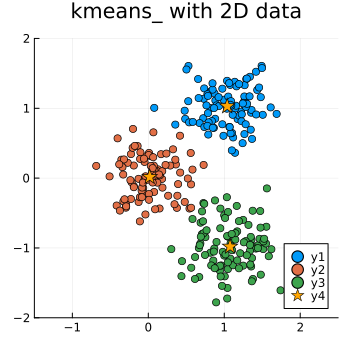

In [19]:
# Generate a vector of random 2D-vectors for testing the two algorithms:
X = vcat( [ 0.3*randn(2) for i = 1:100 ],
[ [1,1] + 0.3*randn(2) for i = 1:100 ],
[ [1,-1] + 0.3*randn(2) for i = 1:100 ] );


k = 3;
c, z, J = kmeans_(X, k);   # k-means clustering by the above algorithm

# Scatter plot of the clustering solution
N = length(X)
scatter(title = "kmeans_ with 2D data",
    label = " ", legend = :bottomright, size = (350,350), xlims = (-1.5,2.5), ylims = (-2,2))
for j = 1:k
    Cj = [X[i] for i=1:N if c[i] == j]
    scatter!([x[1] for x in Cj], [x[2] for x in Cj])
end
# Add cluster centers to the scatter plot:
scatter!([cs[1] for cs in z], [cs[2] for cs in z], marker = :star, markersize = 8, color = :orange)


Iteration 1: Jclust = 0.9315878066857435.
Iteration 2: Jclust = 0.36568256103958974.
Iteration 3: Jclust = 0.18134917968326597.
Iteration 4: Jclust = 0.17749472519699616.
Iteration 5: Jclust = 0.1772333146373226.


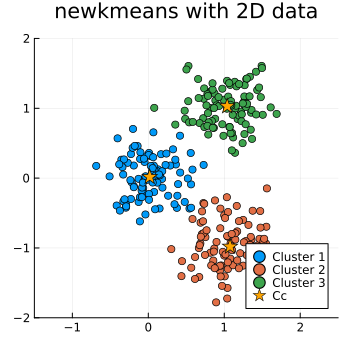

In [20]:
# Here we convert the vector X of vectors defined above into a matrix XX where the elements of X become the row-vectors of XX:
XX = hcat(X...)' 

## Now, we run the new algorithm with the data in matrix format
k = 3;
Cid, Cc, J, cs = newkmeans(XX, k; tol = 5e-3);

# Scatter plot of the clustering solution
p = scatter(title = "newkmeans with 2D data",
    label = " ", legend = :bottomright, size = (350,350), xlims = (-1.5,2.5), ylims = (-2,2))
    for i=1:k
        snr = findall(vec(Cid.==i)); # the sample numbers of the i-th cluster
        scatter!(p, XX[snr,1], XX[snr,2], label = string("Cluster ",i))
    end
# Add cluster centers to the scatter plot:
scatter!(p, Cc[:,1],Cc[:,2], marker = :star, markersize = 8, color = :orange, label = "Cc")
display(p)

**Ex. D1:** Compare the two alogorithms, and comment on their main differences (regarding initialization and convergence/termination).

Forskjellen mellom funksjonene er at newkmeans starter med tilfeldige punkter som cluster-senteret, mens i k-means blir punktene gitt et cluster tilfeldig og deretter blir cluster-sentrene kalkulert. Altså at newkmeans tar alt på en gang, mens k-means oppdaterer for hvert punkt.

I tillegg, er newkmeans raskere ettersom den har høyere tol verdi. Den konvergerer derfor fortere.

 **Ex. D2:** Modify the "newkmeans"-algorithm into a version **"anewkmeans"** that compare angles between vectors instead of distances.

In [21]:
function anewkmeans(X, k; tol = 5e-3)
# ------------- Another implementation of the k-means algorithm -------------------
# INPUT: ----------------------------------------------------------------------
# X        - data matrix (observed datapoints are rows in X).
# k        - the number of clusters (an integer >= 2, typically 2 to something smaller than the number of rows in X).
# OUTPUT: ---------------------------------------------------------------------
# C        - vector of final cluster labels (1,..,k) assigned to each datapoint.
# Z        - matrix of final cluster centers (given as rows)
# JS       - objective function values describing the clustering process (J small means good clustering)
# cs       - the sizes of each cluster
# -----------------------------------------------------------------------------
JS = [];                             # objective function values describing the mean squared distances of the clustering process.
N      = size(X,1);                  # number of samples (rows) in tha data matrix
D2     = Array{Float64}(undef, N, k);# Matrix for storing distances between samples and cluster centers. #D2 = zeros(N, k); %D2 = nan(N,k);
C      = zeros(N);                   # N-vector of the cluster assignments
cs     = zeros(k);                   # k-vector to contain the cluster sizes

Jcurrent = 0; Jprevious = -1;     # Jcurrent and Jprevious represent objective function values - to be updated in the clustering process.

ids = randperm(N)[1:k];           # Generate k random integers in [1, N] for random selection of cluster centers from X.
Z   = copy(X[ids,:]);             # The initial randomy selected cluster centers according to "ids" above.

iter = 1;                         # For counting the number of iterations before convergence

while abs((Jcurrent-Jprevious)/Jprevious) > tol # Repeat until convergence of the objective function values 
        for h = 1:N
            for i = 1:k # Here we calculate all the distances between X-rows and the cluster centers
                D2[h,i] = mycos(X[h, :], Z[i, :]); # Squared euclidean distance for all samples to i-th cluster center.
        end
    end
    
    # Identify shortest distance and corresponding cluster number for each observation:
    minD2, C = findmin(D2, dims=2); C = getindex.(C,2); # convert from CartesianIndex to column number  
    # update old and new objective function values
    Jprevious = Jcurrent; Jcurrent = sum(minD2)/N; JS = [JS; Jcurrent];                    

    # Update the cluster centers based on the labelling of Cid:
    for i = 1:k
        rows_i = findall(vec(C.==i));                   # Find row-numbers of all cluster members of the i-th cluster.
        cs[i] = length(rows_i)                          # Number of samples in cluster i.
        if cs[i]>0                                      # Update if i-th cluster is non-empty.
        Z[i,:] = sum(X[rows_i,:],dims = 1)./cs[i]       # Update cluster centers as the mean of the cluster members.
        end
    end, println("Iteration ", iter, ": Jclust = ", Jcurrent, ".");  
    iter +=1
end 

return C, Z, JS, cs;
end

anewkmeans (generic function with 1 method)

 **Ex. D3:** Apply the **"anewkmeans"-algorithm** to the wikipedia data as described in [section 4.4.2 of the VMLS Julia companion](https://web.stanford.edu/~boyd/vmls/vmls-julia-companion.pdf#page=46) (display most frequent words in each cluster and the titles (documents) most similar to the cluster centers):

In [ ]:
articles, dictionary, titles = wikipedia_data();
art = hcat(articles...)';
N = size(art,1)

assignment, reps = anewkmeans(articles, 10)

Iteration 1: Jclust = 0.04053948776272745.
Iteration 2: Jclust = 0.05566462198610728.
Iteration 3: Jclust = 0.09624087352290958.
Iteration 4: Jclust = 0.034322442699033326.
Iteration 5: Jclust = 0.06492654664086323.
Iteration 6: Jclust = 0.046974188709259915.
Iteration 7: Jclust = 0.10220752846411425.
Iteration 8: Jclust = 0.07538990071704102.
Iteration 9: Jclust = 0.11238054717562315.
Iteration 10: Jclust = 0.1095990767096265.
Iteration 11: Jclust = 0.04345862114339848.
Iteration 12: Jclust = 0.06609133348689822.
Iteration 13: Jclust = 0.0435109872307238.
Iteration 14: Jclust = 0.05096674412418515.
Iteration 15: Jclust = 0.043463101912451355.
Iteration 16: Jclust = 0.051156023888984666.
Iteration 17: Jclust = 0.043440753355269736.
Iteration 18: Jclust = 0.051062393070268886.
Iteration 19: Jclust = 0.04355296977155757.
Iteration 20: Jclust = 0.051156023888984666.
Iteration 21: Jclust = 0.043440753355269736.
Iteration 22: Jclust = 0.051062393070268886.
Iteration 23: Jclust = 0.043552969

In [ ]:
d = [ norm(articles[i] - reps[assignment[i]]) for i = 1:N ];
for j = 1:k
group = [ i for i=1:N if assignment[i] == j ]
println()
println("Cluster ", j, " (", length(group), " articles)")
I = sortperm(reps[j], rev=true)
println("Top words: \n ", dictionary[I[1:5]]);
println("Documents closest to representative: ")
I = sortperm(d[group])
for i= 1:5
println(" ", titles[group[I[i]]])
end
end


 **Ex. D4:** How stable are the cluster solutions you obtain for the wikipedia data using a fixed number ($k=10$) of clusters in the **"anewkmeans"**-algorithm. Discuss/implement an improvenent of your algorithm and compare for the same (wikipedia) data.